# Analysis of Factors Contributing to Final Grades of a Porteguese Class

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_por = pd.read_csv('student-por.csv')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Histograms

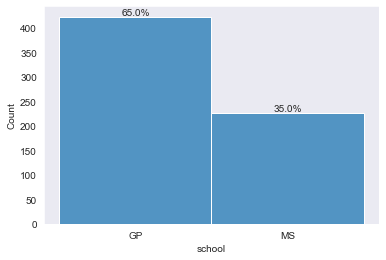

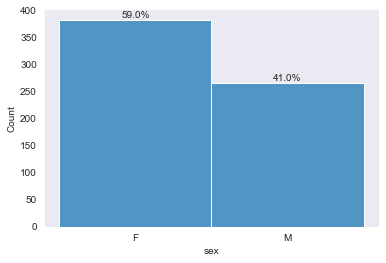

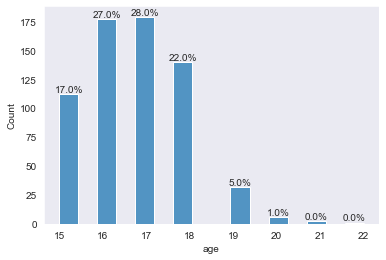

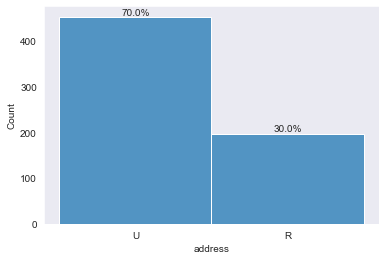

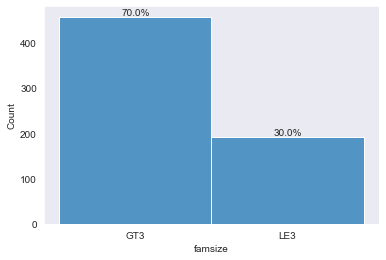

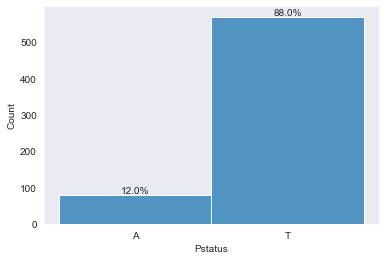

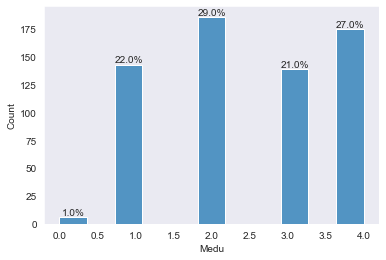

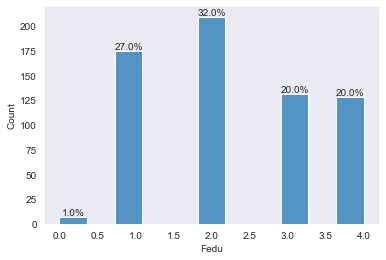

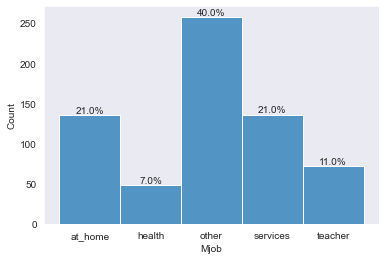

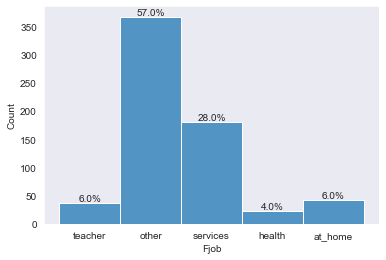

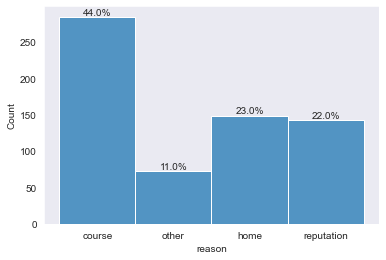

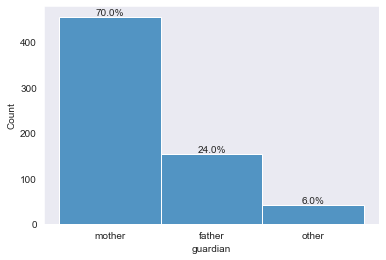

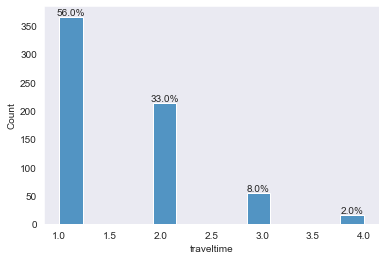

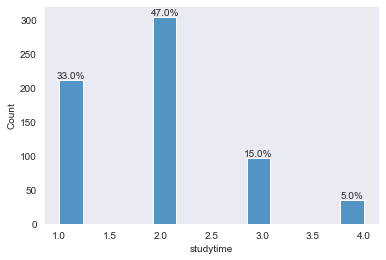

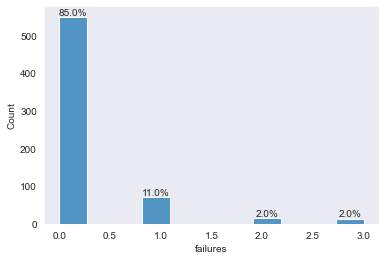

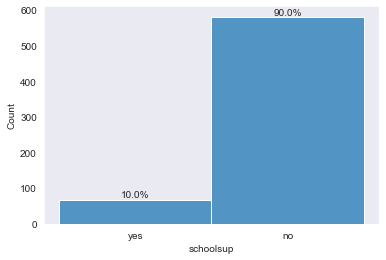

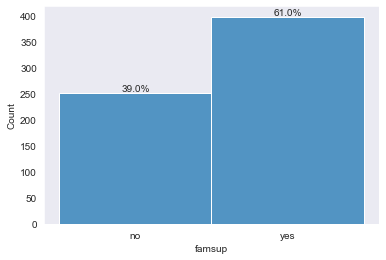

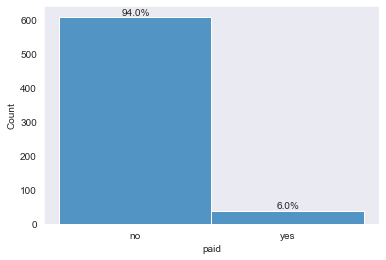

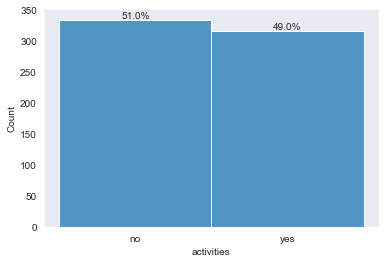

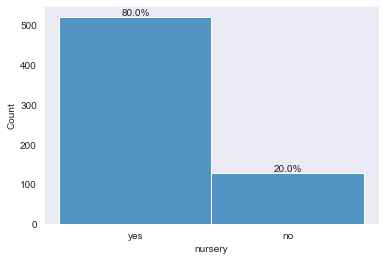

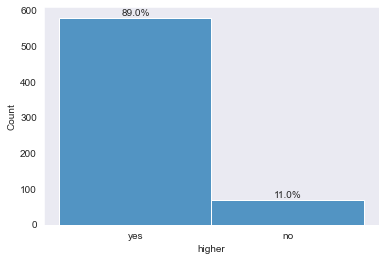

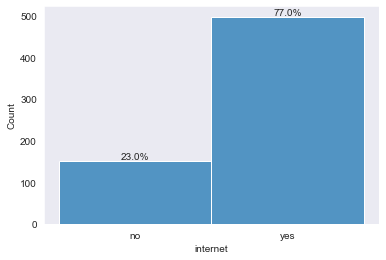

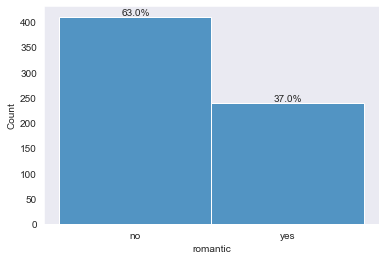

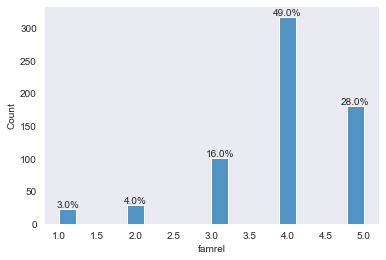

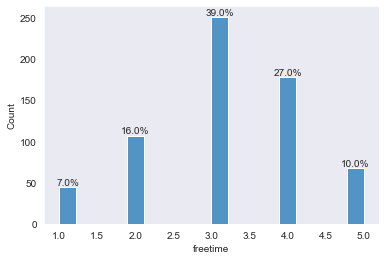

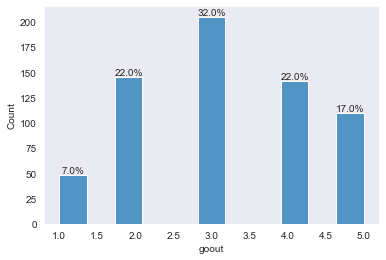

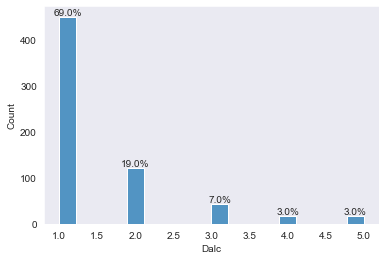

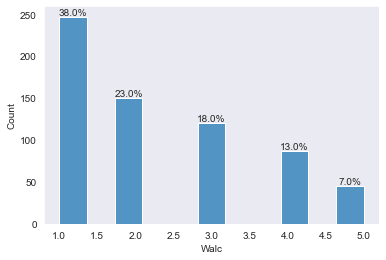

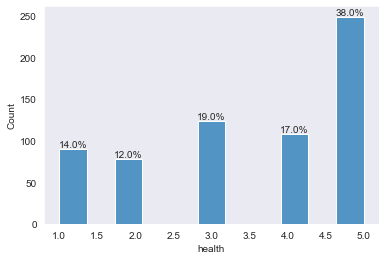

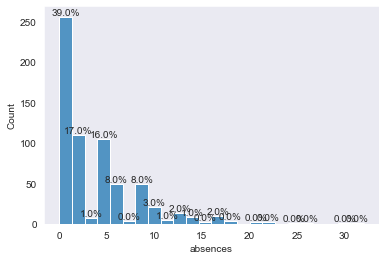

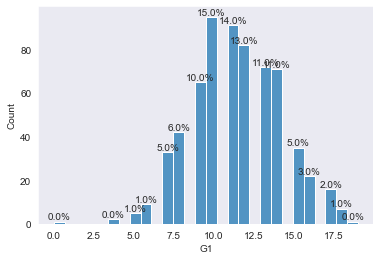

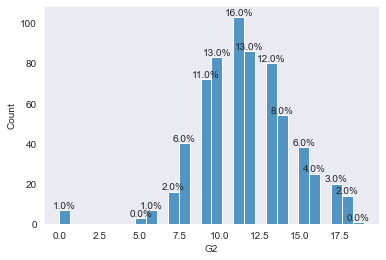

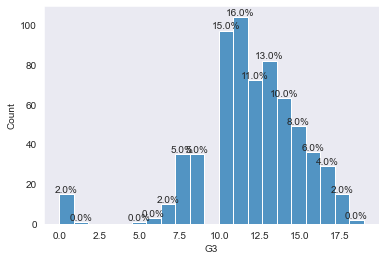

In [3]:
#Look at the distribution of each attribute
sns.set_style("dark")
for i in range(len(df_por.columns)):
    fig, ax = plt.subplots()
    y=sns.histplot(df_por.iloc[:,i])  
    labels = [str(round((v/649)*100,0))+"%" if v else '' for v in y.containers[0].datavalues]
    y.bar_label(y.containers[0], labels=labels)
    plt.show()

## Outlier Identification

In [4]:
# Create a method to calculate outliers
def find_outliers_iqr(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outliers

In [5]:
# Calling the outlier method to find outlier in 'age' column
find_outliers_iqr(df_por['age'])

279    22
Name: age, dtype: int64

In [6]:
df_por.iloc[[279]]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
279,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,12,7,8,5


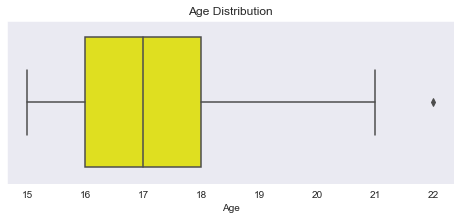

In [7]:
#Draw a boxplot to visually identify the outliers in age column
plt.figure(figsize=(8,3))
sns.boxplot(x=df_por["age"], color='yellow')
plt.title("Age Distribution")
plt.xlabel("Age");

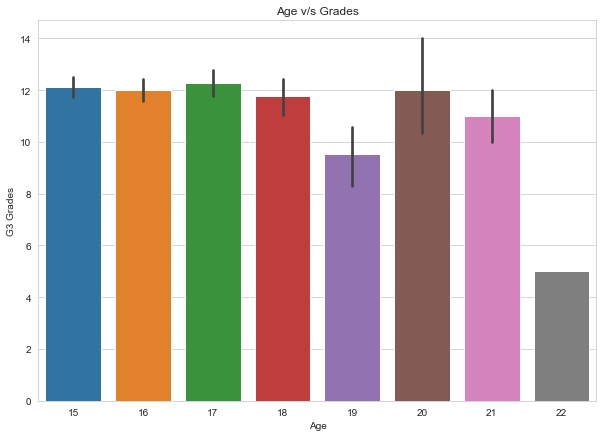

In [8]:
plt.figure(figsize=(10,7));
sns.set_style('whitegrid')
ax = sns.barplot(data=df_por, x='age', y=df_por['G3']);
ax.set_title('Age v/s Grades');
ax.set_xlabel('Age');
ax.set_ylabel('G3 Grades');

Text(0.5, 1.0, 'Age v/s Gender Distribution')

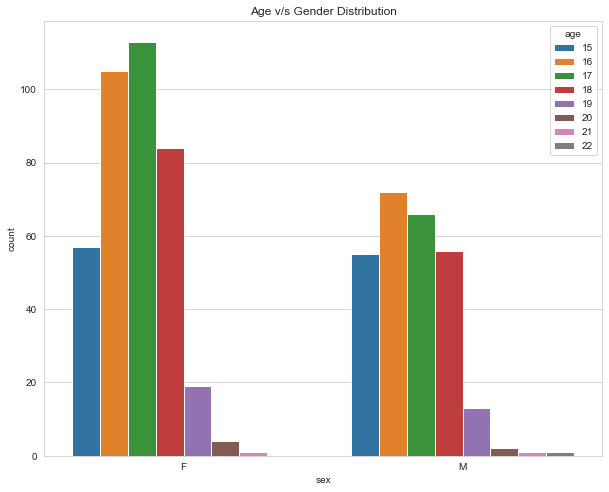

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_por['sex'],hue=df_por['age']);
plt.title('Age v/s Gender Distribution')

## Correlation Heat Map

### Creating Dummy Variables

In [10]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [11]:
# Categorical variables with only two levels: converting to one binary dummy

binary_list = ['school', 'sex','address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

df_por_reg = df_por

for column in binary_list:
    df_por_reg[column]=df_por[column].astype("category").cat.codes

df_por_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    int8  
 1   sex         649 non-null    int8  
 2   age         649 non-null    int64 
 3   address     649 non-null    int8  
 4   famsize     649 non-null    int8  
 5   Pstatus     649 non-null    int8  
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int8  
 16  famsup      649 non-null    int8  
 17  paid        649 non-null    int8  
 18  activities  649 non-null    int8  
 19  nursery     649 non-null    int8  
 20  higher    

In [12]:
# Categorical variables with more than two levels: converting to multiple binary dummies

cat_list = ['Mjob', 'Fjob', 'reason', 'guardian']

df_por_reg = pd.get_dummies(df_por_reg, columns=cat_list, drop_first=True)
df_por_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             649 non-null    int8 
 1   sex                649 non-null    int8 
 2   age                649 non-null    int64
 3   address            649 non-null    int8 
 4   famsize            649 non-null    int8 
 5   Pstatus            649 non-null    int8 
 6   Medu               649 non-null    int64
 7   Fedu               649 non-null    int64
 8   traveltime         649 non-null    int64
 9   studytime          649 non-null    int64
 10  failures           649 non-null    int64
 11  schoolsup          649 non-null    int8 
 12  famsup             649 non-null    int8 
 13  paid               649 non-null    int8 
 14  activities         649 non-null    int8 
 15  nursery            649 non-null    int8 
 16  higher             649 non-null    int8 
 17  internet        

In [13]:
# add column of ones for regression intercept

df_por_reg['Eins'] = np.ones((len(df_por_reg), ))

df_por_reg.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,Eins
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,1,0,0,0,1,0,1.0
1,0,0,17,1,0,1,1,1,1,2,...,0,1,0,0,0,0,0,0,0,1.0
2,0,0,15,1,1,1,1,1,1,2,...,0,1,0,0,0,1,0,1,0,1.0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,1,0,1,0,0,1,0,1.0
4,0,0,16,1,0,1,3,3,1,2,...,0,1,0,0,1,0,0,0,0,1.0


### Correlation Heat Map with Dummy Variables

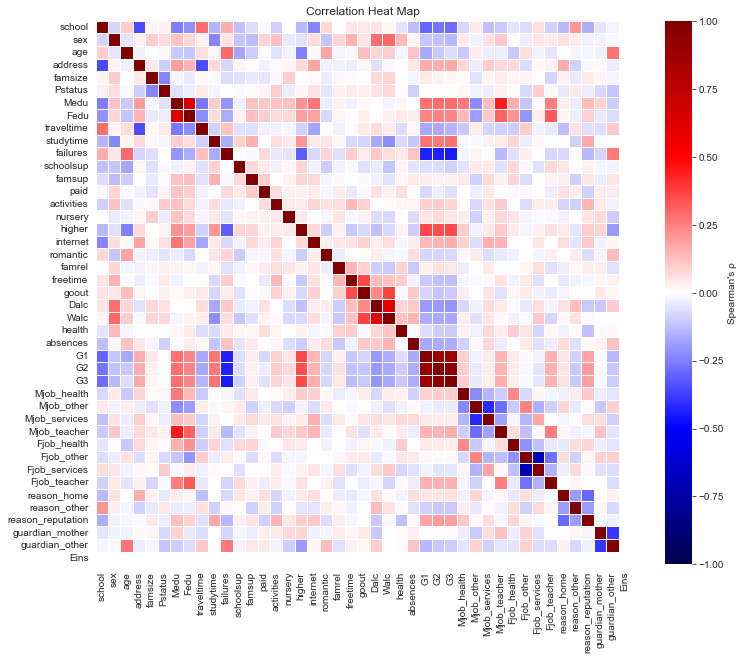

In [14]:
#mask = np.triu(np.ones_like(df_por_reg.corr(method='spearman'),dtype=bool))

plt.figure(figsize=(12,10))
ax = sns.heatmap(df_por_reg.corr(method='spearman'), cmap="seismic", annot=False, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);  #,mask=mask
ax.set_title("Correlation Heat Map");



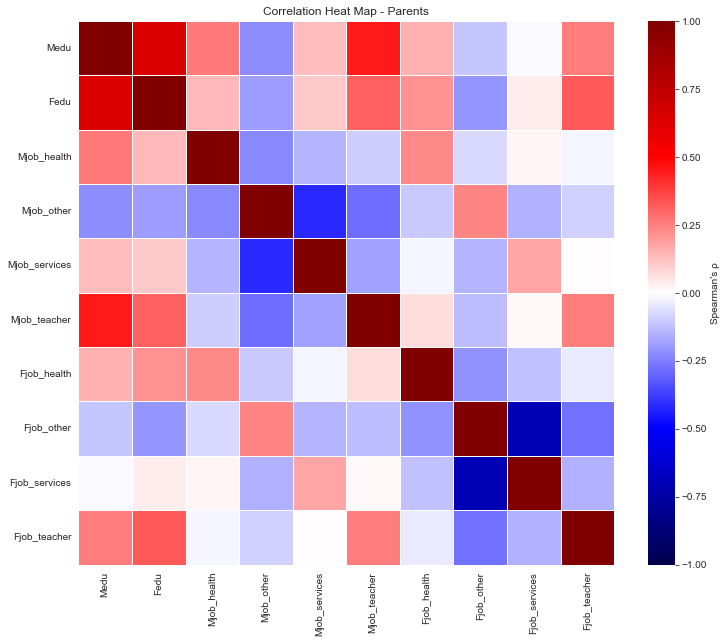

In [15]:
# focus on parents

df_por_parents = df_por_reg.loc[:,'Medu':'Fedu'].merge(right = df_por_reg.loc[:,'Mjob_health':'Fjob_teacher'], left_index=True, right_index=True)

#mask = np.triu(np.ones_like(df_por_parents.corr(method='spearman'),dtype=bool))

plt.figure(figsize=(12,10))
ax = sns.heatmap(df_por_parents.corr(method='spearman'), cmap="seismic", annot=False, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);  #,mask=mask
ax.set_title("Correlation Heat Map - Parents");

## Exploring Average Pass Rate by Factor


In [16]:
col_list1 = list(df_por["G3"])

GradeGroup = []

length = (len(col_list1))
for i in range(length):
    if 0 <= (col_list1[i]) <= 10: #below 50% average
        GradeGroup.append(1)
    elif 11 <= (col_list1[i]) <= 20: #above 50% average 
        GradeGroup.append(2)
    else:
        GradeGroup.append(0)
df_por['GradeGroup'] = GradeGroup

print("% of Students that Passed: ",len(df_por.query('GradeGroup == 2')) / len(df_por.query('GradeGroup')))

% of Students that Passed:  0.6964560862865947


In [17]:
#higher - wants to take higher education (binary: yes or no) 

print("% of Students that passed with intentions of higher education: ",len(df_por.query('higher==0 and GradeGroup==2')) / len(df_por.query('higher==0')))
print("% of Students that passed with intentions of higher education: ",len(df_por.query('higher==1 and GradeGroup==2')) / len(df_por.query('higher==1')))

% of Students that passed with intentions of higher education:  0.2463768115942029
% of Students that passed with intentions of higher education:  0.75


In [18]:
#failures - number of past class failures (numeric: n if 1<=n<3, else 4)

print("% of Students that Passed with no failed classes: ",len(df_por.query('failures==0 and GradeGroup==2')) / len(df_por.query('GradeGroup==2')))

% of Students that Passed with no failed classes:  0.9579646017699115


In [19]:
#school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

print("% of Students from Gabriel Pereira that passed: ",len(df_por.query('school==0 and GradeGroup==2')) / len(df_por.query('school==0 ')))
print("% of Students from Mousinho da Silveira that passed: ",len(df_por.query('school==1 and GradeGroup==2')) / len(df_por.query('school==1')))

% of Students from Gabriel Pereira that passed:  0.7990543735224587
% of Students from Mousinho da Silveira that passed:  0.504424778761062


In [20]:
#romantic - with a romantic relationship (binary: yes or no)

print("% of Students that Passed while dating: ",len(df_por.query('romantic==0 and GradeGroup==2')) / len(df_por.query('romantic==0')))
print("% of Students that Passed not dating: ",len(df_por.query('romantic==1 and GradeGroup==2')) / len(df_por.query('romantic==1')))

% of Students that Passed while dating:  0.7317073170731707
% of Students that Passed not dating:  0.6359832635983264


In [21]:
#schoolsup - extra educational support (binary: yes or no)

print("% of Students that Passed with Extra School Support: ",len(df_por.query('schoolsup==0 and GradeGroup==2')) / len(df_por.query('schoolsup==0')))
print("% of Students that Passed with no Extra School Support: ",len(df_por.query('schoolsup==1 and GradeGroup==2')) / len(df_por.query('schoolsup==1')))

% of Students that Passed with Extra School Support:  0.7005163511187608
% of Students that Passed with no Extra School Support:  0.6617647058823529


In [22]:
#health - 3 and over is good health, 2 and under is bad health
col_list2 = list(df_por["health"])

HealthGroup = []

length = (len(col_list2))
for i in range(length):
    if 0 <= (col_list2[i]) <= 2: #bad health status
        HealthGroup.append(1)
    elif 3 <= (col_list2[i]) <= 5: #average and above health status
        HealthGroup.append(2)
    else:
        HealthGroup.append(0)
        
df_por['HealthGroup'] = HealthGroup

print("% of Students that Passed With Good Health: ",len(df_por.query('HealthGroup == 2 and GradeGroup==2')) / len(df_por.query('HealthGroup==2')))
print("% of Students that Passed With Bad Health: ",len(df_por.query('HealthGroup == 1 and GradeGroup==2')) / len(df_por.query('HealthGroup==1')))

% of Students that Passed With Good Health:  0.6902286902286903
% of Students that Passed With Bad Health:  0.7142857142857143


In [23]:
#age - student's age (numeric: from 15 to 22) 

#out of total pop
print("% of Students that Passed Age 15: ",len(df_por.query('age==15 and GradeGroup==2')) / len(df_por.query('age==15')))
print("% of Students that Passed Age 16: ",len(df_por.query('age==16 and GradeGroup==2')) / len(df_por.query('age==16')))
print("% of Students that Passed Age 17: ",len(df_por.query('age==17 and GradeGroup==2')) / len(df_por.query('age==17')))
print("% of Students that Passed Age 18: ",len(df_por.query('age==18 and GradeGroup==2')) / len(df_por.query('age==18')))
print("% of Students that Passed Age 19: ",len(df_por.query('age==19 and GradeGroup==2')) / len(df_por.query('age==19')))
print("% of Students that Passed Age 20: ",len(df_por.query('age==20 and GradeGroup==2')) / len(df_por.query('age==20')))
print("% of Students that Passed Age 21: ",len(df_por.query('age==21 and GradeGroup==2')) / len(df_por.query('age==21')))
print("% of Students that Passed Age 22: ",len(df_por.query('age==22 and GradeGroup==2')) / len(df_por.query('age==22')))

% of Students that Passed Age 15:  0.7857142857142857
% of Students that Passed Age 16:  0.751412429378531
% of Students that Passed Age 17:  0.6759776536312849
% of Students that Passed Age 18:  0.65
% of Students that Passed Age 19:  0.46875
% of Students that Passed Age 20:  0.5
% of Students that Passed Age 21:  0.5
% of Students that Passed Age 22:  0.0


In [24]:
#sex - student's sex (binary: '0' - female or '1' - male) 

print("% of Female Students that Passed: ",len(df_por.query('sex==0 and GradeGroup==2')) / len(df_por.query('sex==0')))
print("% of Male Students that Passed: ",len(df_por.query('sex==1 and GradeGroup==2')) / len(df_por.query('sex==1')))

% of Female Students that Passed:  0.7336814621409922
% of Male Students that Passed:  0.6428571428571429


In [25]:
#studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
col_list2 = list(df_por["studytime"])

StudyTimeGroup = []

length = (len(col_list2))
for i in range(length):
    if 0 <= (col_list2[i]) < 2: 
        StudyTimeGroup.append(1)
    elif 2 <= (col_list2[i]) <= 5: 
        StudyTimeGroup.append(2)
    elif 5 <= (col_list2[i]) <= 10: #no occurances of this
        StudyTimeGroup.append(3)
    elif (col_list2[i]) > 10:  #no occurances of this
        StudyTimeGroup.append(4)
    else:
        StudyTimeGroup.append(0)
        
df_por['StudyTimeGroup'] = StudyTimeGroup


print("% of Students that Passed w/ less than 2 hours of studying out of total pass: ",len(df_por.query('StudyTimeGroup == 1 and GradeGroup==2')) / len(df_por.query('StudyTimeGroup == 1')))
print("% of Students that Passed w/ 2-5 hours of studying out of total pass: ",len(df_por.query('StudyTimeGroup == 2 and GradeGroup==2')) / len(df_por.query('StudyTimeGroup == 2')))


% of Students that Passed w/ less than 2 hours of studying out of total pass:  0.5707547169811321
% of Students that Passed w/ 2-5 hours of studying out of total pass:  0.7574370709382151


## Bar Plots

In [26]:
#Grades based on Daily Alcohol consumption
df_por.pivot_table(columns='Dalc', values=('G1','G2','G3'))

Dalc,1,2,3,4,5
G1,11.698448,11.090909,10.441860,9.941176,9.529412
G2,11.895787,11.157025,10.744186,9.470588,10.058824
G3,12.299335,11.363636,11.139535,8.941176,10.235294


Text(0.5, 1.0, 'Weekday Alcohol consumption v/s Grades')

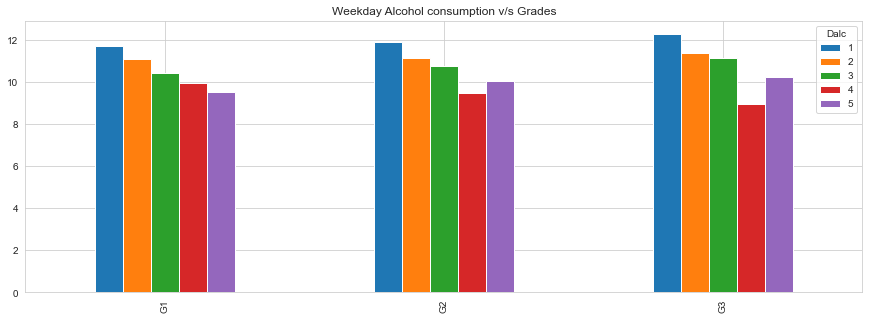

In [27]:
# Plotting bar graph to visualize the impact of Dalc on grades
matplotlib.rc("figure", figsize=(15,5))
df_por.pivot_table(columns='Dalc', values=('G1','G2','G3')).plot(kind='bar')
plt.title("Weekday Alcohol consumption v/s Grades")

In [28]:
#Grades based on weekly alcohol consumption
df_por.pivot_table(columns='Walc', values=('G1','G2','G3'))

Walc,1,2,3,4,5
G1,11.688259,11.746667,11.308333,10.655172,10.333333
G2,11.951417,11.820000,11.500000,10.735632,10.444444
G3,12.360324,12.260000,11.666667,11.034483,10.555556


Text(0.5, 1.0, 'Weekend Alcohol consumption v/s Grades')

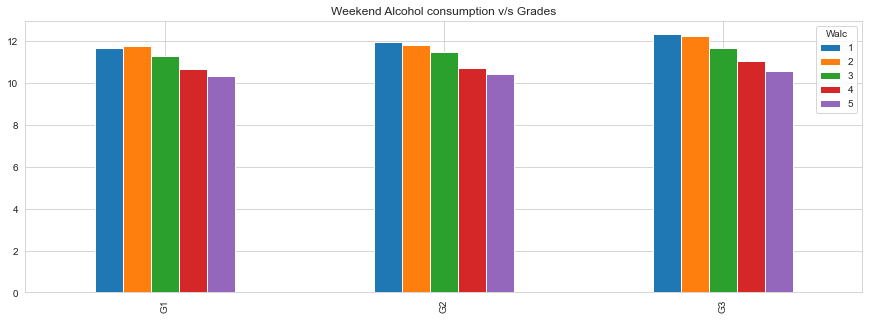

In [29]:
# Plotting bar graph to visualize the impact of Walc on grades
matplotlib.rc("figure", figsize=(15,5))
df_por.pivot_table(columns='Walc', values=('G1','G2','G3')).plot(kind='bar')
plt.title("Weekend Alcohol consumption v/s Grades")

In [30]:
#Grades based on gender
df_por.pivot_table(columns='sex', values=('G1','G2','G3'))

sex,0,1
G1,11.637076,11.056391
G2,11.822454,11.206767
G3,12.253264,11.406015


<AxesSubplot:>

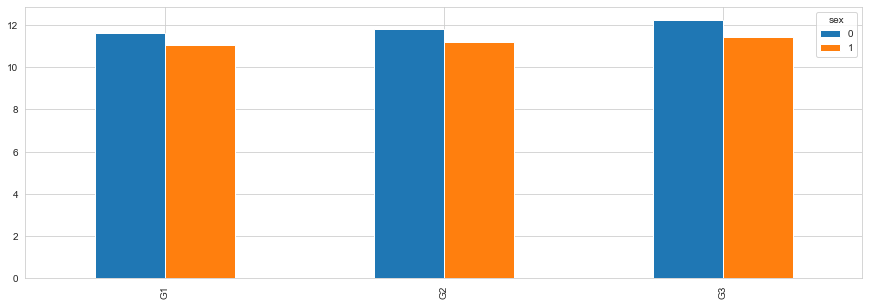

In [31]:
# Plotting bar graph to visualize the impact of sex on grades
df_por.pivot_table(columns='sex', values=('G1','G2','G3')).plot(kind='bar')

In [32]:
df_g1 = df_por['G1'].value_counts().sort_index()
df_g2 = df_por['G2'].value_counts().sort_index()
df_g3 = df_por['G3'].value_counts().sort_index()
display(df_g3.head())

0    15
1     1
5     1
6     3
7    10
Name: G3, dtype: int64

[]

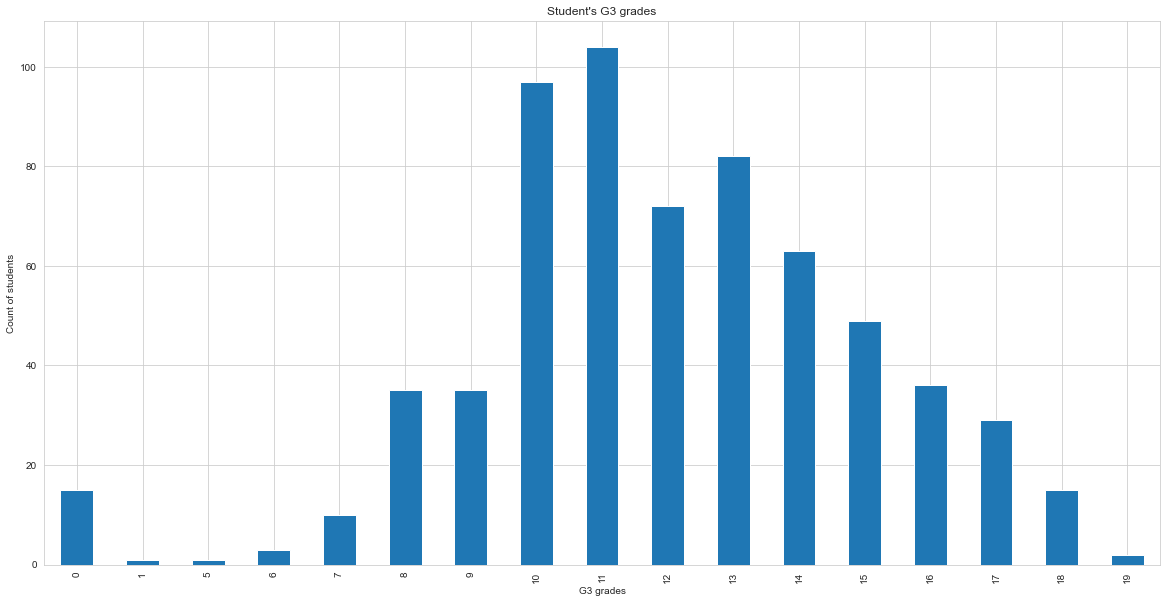

In [33]:
plt.figure(figsize=(20,10))
ax = df_g3.plot(kind='bar')
ax.set_xlabel('G3 grades')
ax.set_ylabel('Count of students')
ax.set_title("Student's G3 grades")
ax.plot()

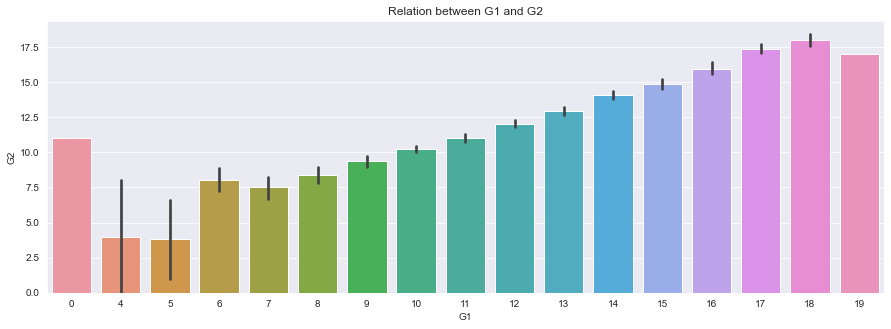

In [34]:
#G1 and G2 relation
sns.set_style('darkgrid')
plt.title("Relation between G1 and G2")
sns.barplot(x="G1",y="G2",data=df_por)
plt.show()

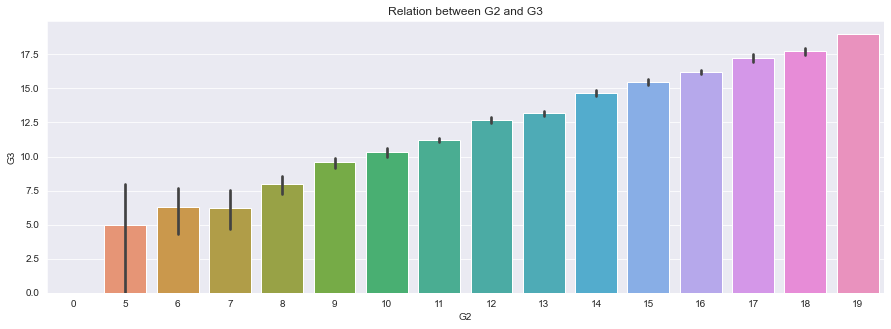

In [35]:
#G2 and G3 relation
sns.set_style('darkgrid')
plt.title("Relation between G2 and G3")
sns.barplot(x="G2",y="G3",data=df_por)
plt.show()

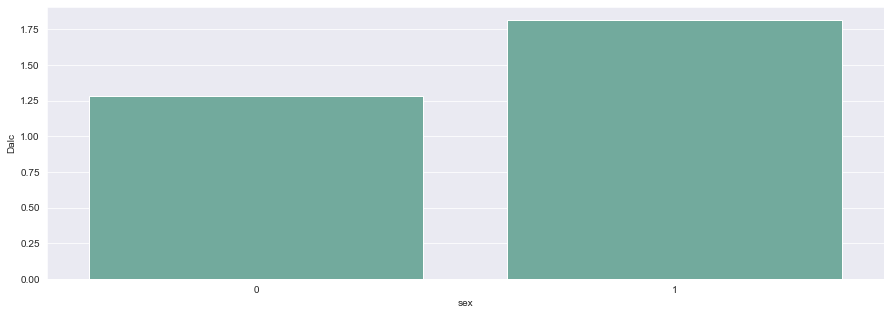

In [36]:
#alcohol consumption based on sex
sns.set_style('darkgrid')
sns.barplot(x = "sex", y = "Dalc", ci=None, color='#69b3a2', data = df_por)
plt.show()

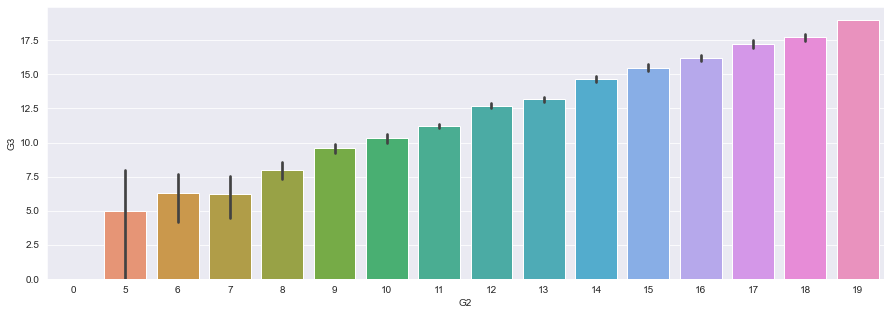

In [37]:
#G2 and G3 relation
sns.set_style('darkgrid')
sns.barplot(x="G2",y="G3",data=df_por)
plt.show()

In [38]:
agesexfail=pd.crosstab(index=df_por["age"], columns=df_por["sex"], values=df_por["failures"], aggfunc="mean").round(2)
agesexfail

sex,0,1
age,,
15,0.07,0.00
16,0.11,0.12
17,0.10,0.42
18,0.29,0.29
19,0.84,0.92
20,0.50,1.50
21,2.00,2.00
22,NaN,3.00


Text(0, 0.5, 'failures')

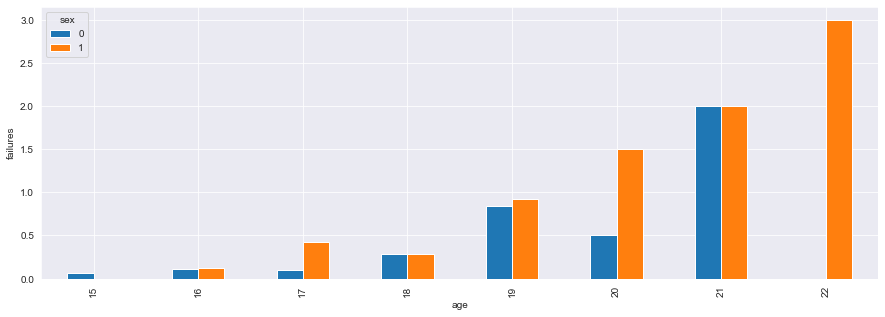

In [39]:
g1=agesexfail.plot(kind="bar")
g1.set_ylabel("failures")

In [40]:
higher1=pd.crosstab(index=df_por["higher"], columns=df_por["sex"], values=df_por["G3"], aggfunc="mean").round(2)
higher1

sex,0,1
higher,,
0,9.03,8.56
1,12.58,11.82


Text(0, 0.5, '')

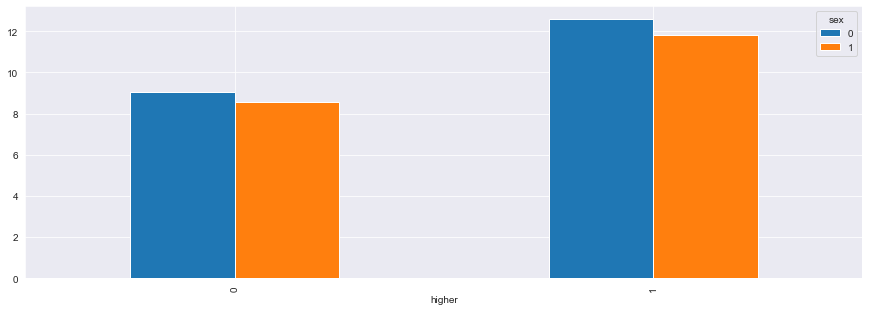

In [41]:
g2=higher1.plot(kind="bar")
g2.set_ylabel("")

In [42]:
AgeG3=pd.crosstab(index=df_por["age"], columns=df_por["sex"], values=df_por["G3"], aggfunc="mean").round(2)
AgeG3


sex,0,1
age,,
15,12.00,12.22
16,12.42,11.38
17,12.88,11.21
18,12.05,11.36
19,9.37,9.77
20,11.75,12.50
21,12.00,10.00
22,NaN,5.00


Text(0, 0.5, 'Avg G3')

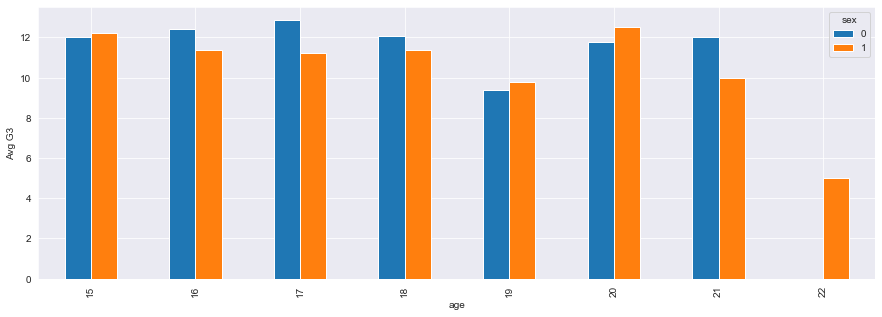

In [43]:
g3=AgeG3.plot(kind="bar")
g3.set_ylabel("Avg G3")


## Pair Plot

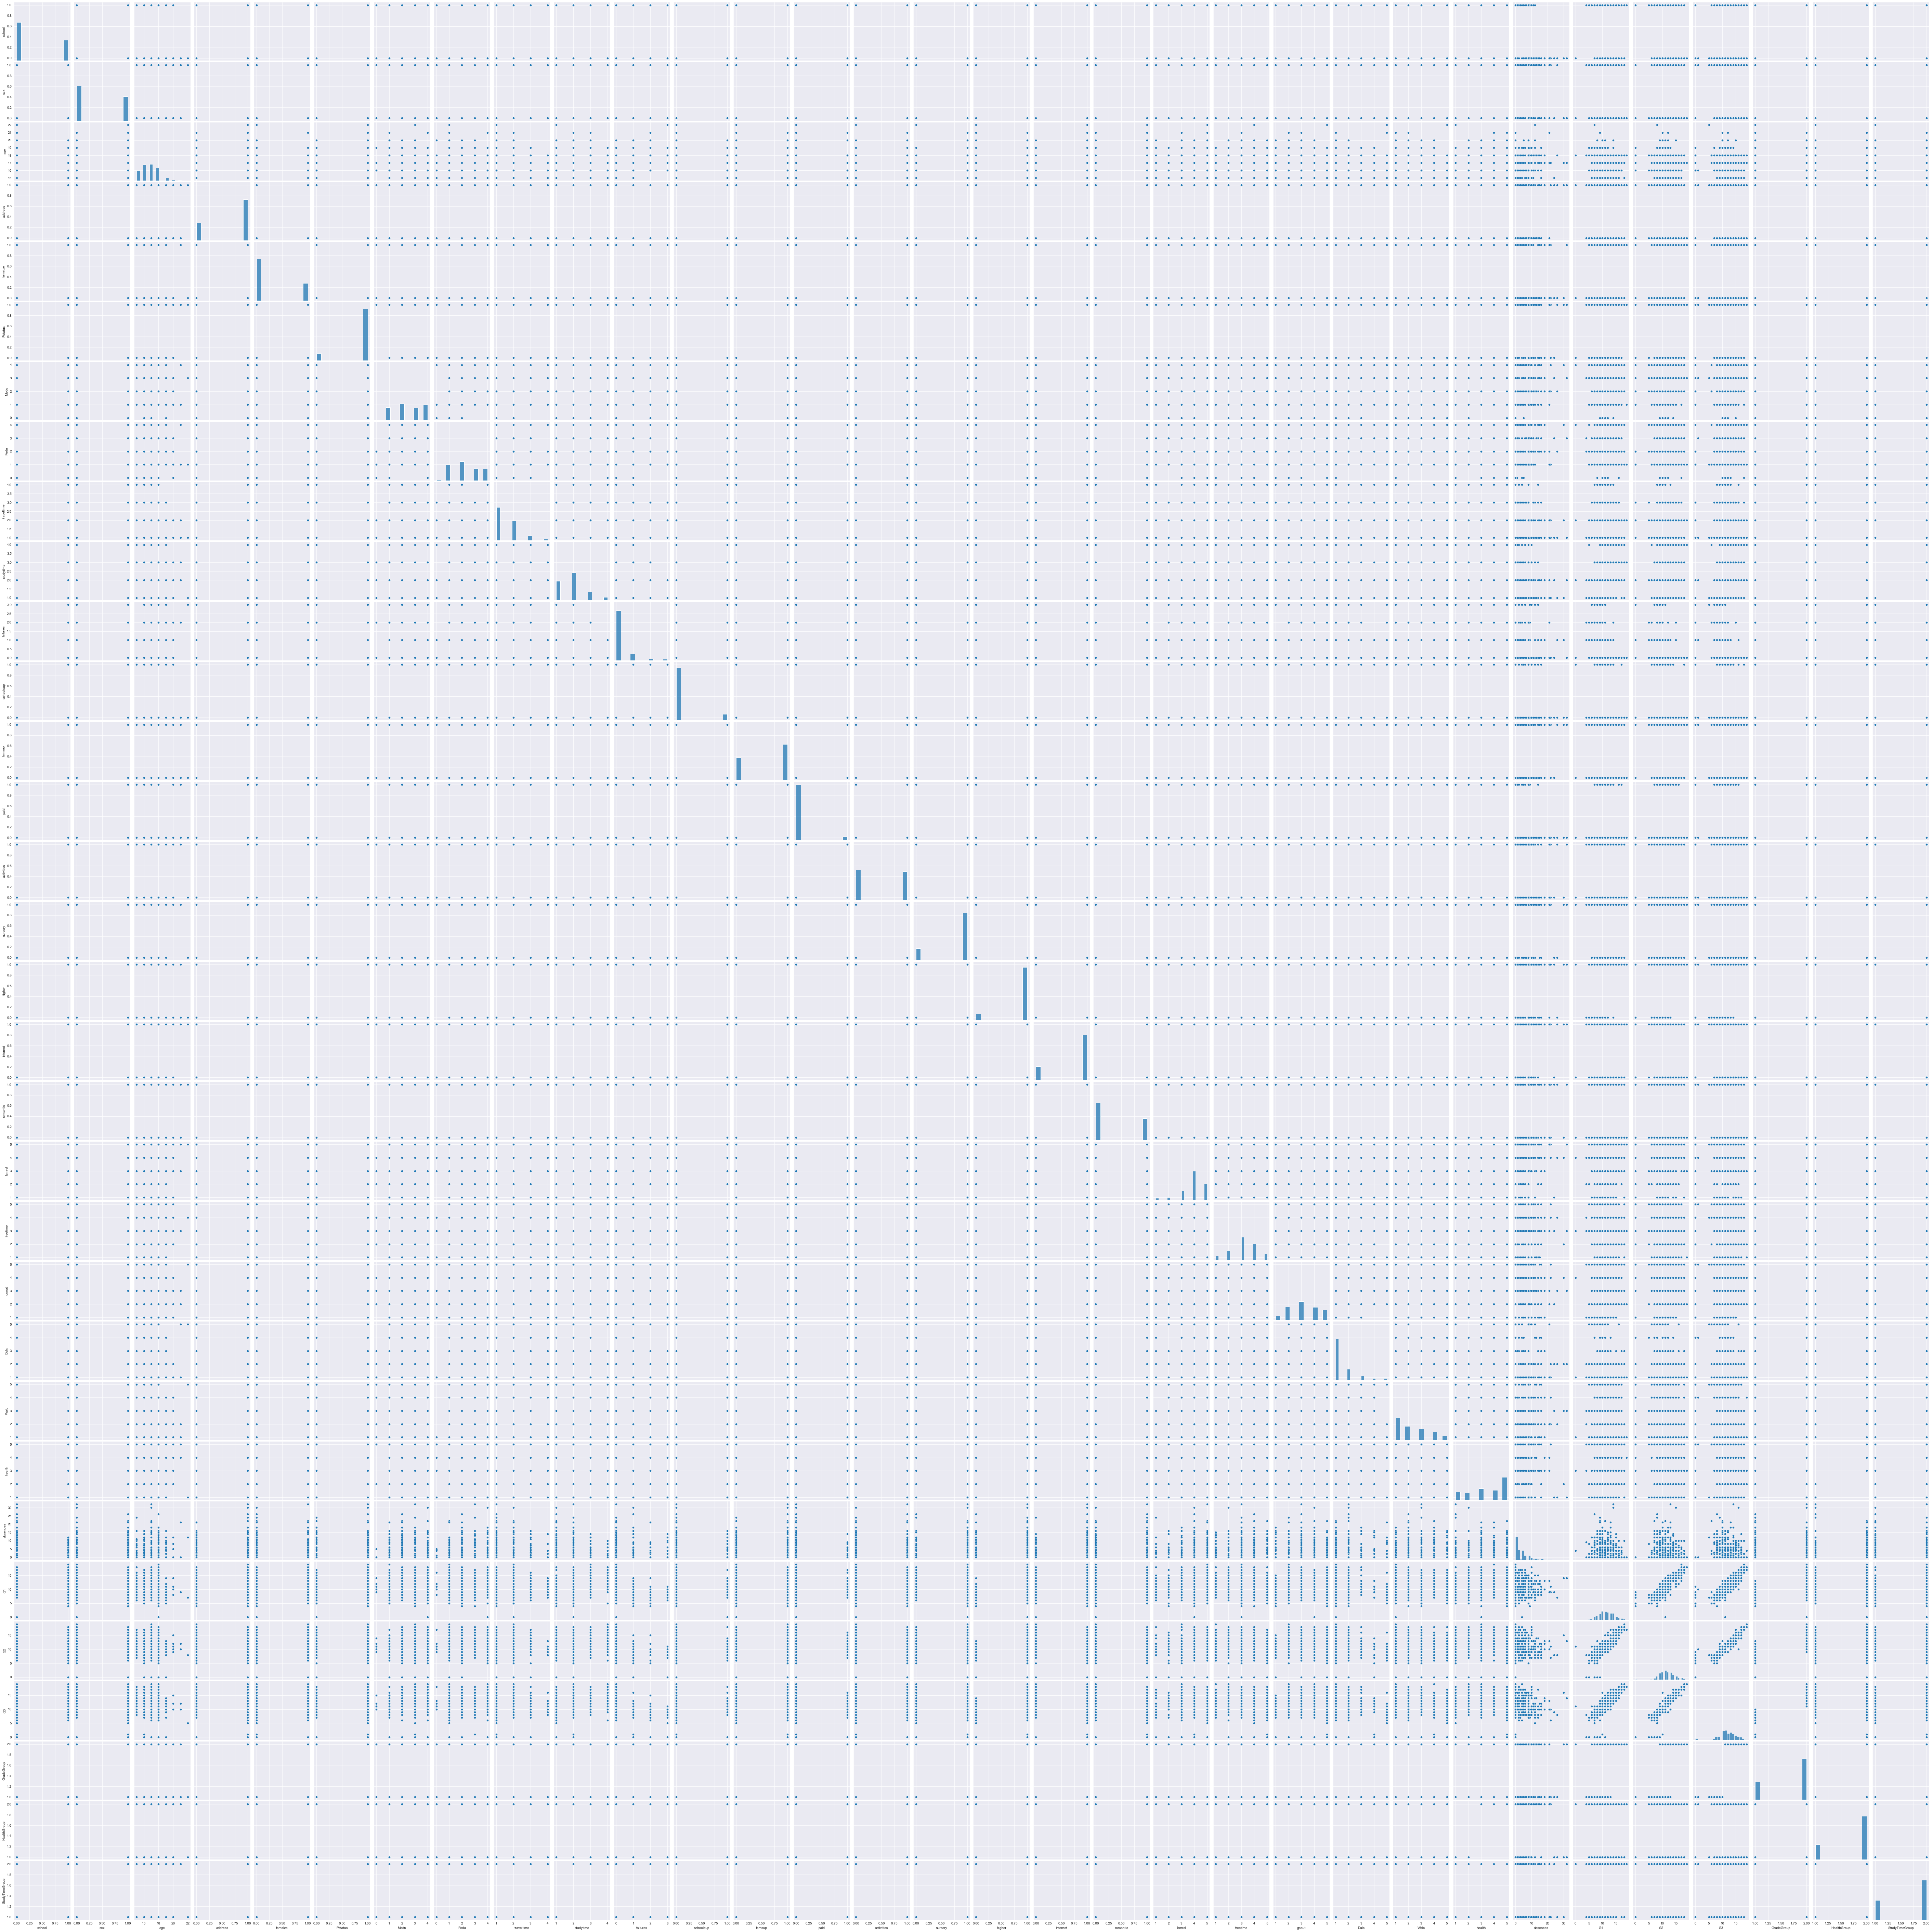

In [44]:
sns.pairplot(df_por)


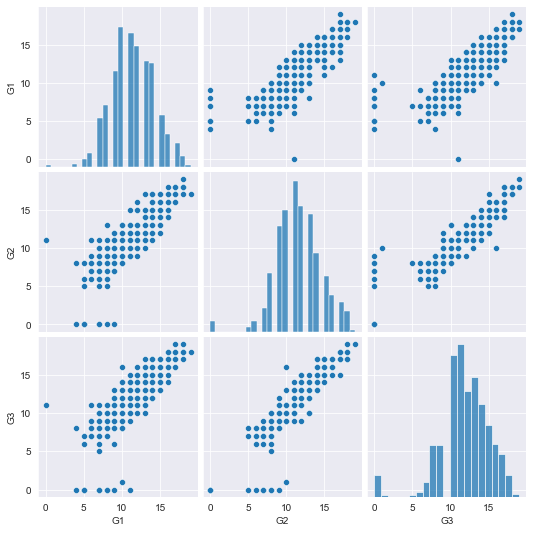

In [45]:
sns.pairplot(df_por.loc[:,"G1":"G3"])

## Regression


### Train/Test Split

In [46]:
df_por_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             649 non-null    int8   
 1   sex                649 non-null    int8   
 2   age                649 non-null    int64  
 3   address            649 non-null    int8   
 4   famsize            649 non-null    int8   
 5   Pstatus            649 non-null    int8   
 6   Medu               649 non-null    int64  
 7   Fedu               649 non-null    int64  
 8   traveltime         649 non-null    int64  
 9   studytime          649 non-null    int64  
 10  failures           649 non-null    int64  
 11  schoolsup          649 non-null    int8   
 12  famsup             649 non-null    int8   
 13  paid               649 non-null    int8   
 14  activities         649 non-null    int8   
 15  nursery            649 non-null    int8   
 16  higher             649 non

In [47]:
# omits G1, G2, G3
X = df_por_reg.loc[:,'school':'absences'].merge(right = df_por_reg.loc[:,'Mjob_health':'Eins'], left_index=True, right_index=True)
y = df_por_reg.loc[:,'G3']    # G3 only

print(X.shape)
print(y.shape)

(649, 40)
(649,)


In [48]:
test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 12)    #set state for reproducible outcome

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(486, 40)
(163, 40)
(486,)
(163,)


In [49]:
# second data split including G1, G2
X1 = df_por_reg.loc[:,'school':'G2'].merge(right = df_por_reg.loc[:,'Mjob_health':'Eins'], left_index=True, right_index=True)
y1 = df_por_reg.loc[:,'G3']    # G3 only

print(X1.shape)
print(y1.shape)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state = 12)    #set state for reproducible outcome

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(649, 42)
(649,)
(486, 42)
(163, 42)
(486,)
(163,)


In [50]:
# setting up df to capture results
labels = [['Linear','RF'],['No Midterm', 'With Midterm'], ['Outlier Removed', 'Outlier Included']]
index = pd.MultiIndex.from_product(labels, names=['Model Type', 'Midterm Status', 'Outlier Status'])

df_results = pd.DataFrame(np.reshape(np.zeros(16),(8,2)), index=index, columns=['MSE','R^2'])
df_results

MSE  R^2
Model Type Midterm Status Outlier Status            
Linear     No Midterm     Outlier Removed   0.0  0.0
                          Outlier Included  0.0  0.0
           With Midterm   Outlier Removed   0.0  0.0
                          Outlier Included  0.0  0.0
RF         No Midterm     Outlier Removed   0.0  0.0
                          Outlier Included  0.0  0.0
           With Midterm   Outlier Removed   0.0  0.0
                          Outlier Included  0.0  0.0

### Linear Regression

In [51]:
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)

y_pred = linear_regr.predict(X_test) 

print("MSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

df_results.loc[('Linear', 'No Midterm', 'Outlier Included'), 'MSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
df_results.loc[('Linear', 'No Midterm', 'Outlier Included'), 'R^2'] = r2_score(y_test, y_pred)

#print(df_results)

MSE: 3.188126836410497
R²: 0.1902361849040488


In [52]:
y_test.std()

3.5537977079323944

In [53]:
# using data with G1, G2

linear_regr1 = LinearRegression()
linear_regr1.fit(X1_train, y1_train)

y1_pred = linear_regr1.predict(X1_test) 

print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred)))
print("R²:", r2_score(y1_test, y1_pred))


df_results.loc[('Linear', 'With Midterm', 'Outlier Included'), 'MSE'] = np.sqrt(mean_squared_error(y1_test, y1_pred))
df_results.loc[('Linear', 'With Midterm', 'Outlier Included'), 'R^2'] = r2_score(y1_test, y1_pred)

RMSE: 1.3065663803417142
R²: 0.8639964820984167


### Random Forest Regression

In [54]:
rf_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) #RMSE: root mean square error
print("R²:", r2_score(y_test, y_pred))

df_results.loc[('RF', 'No Midterm', 'Outlier Included'), 'MSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
df_results.loc[('RF', 'No Midterm', 'Outlier Included'), 'R^2'] = r2_score(y_test, y_pred)

RMSE: 3.0224721730414355
R²: 0.27220041050213784


In [55]:
y_test.std()

3.5537977079323944

In [56]:
# using data with G1, G2

rf_reg1 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf_reg1.fit(X1_train, y1_train)

y1_pred = rf_reg1.predict(X1_test)

print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred))) #RMSE: root mean square error
print("R²:", r2_score(y1_test, y1_pred))

df_results.loc[('RF', 'With Midterm', 'Outlier Included'), 'MSE'] = np.sqrt(mean_squared_error(y1_test, y1_pred))
df_results.loc[('RF', 'With Midterm', 'Outlier Included'), 'R^2'] = r2_score(y1_test, y1_pred)

RMSE: 1.515909089654838
R²: 0.8169231218552657


### Outlier Removal

Test if removing age=22 improves the models

In [57]:
df_por_out = df_por_reg[df_por_reg['age']<22]

df_por_out.info()
# one outlier removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 648
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             648 non-null    int8   
 1   sex                648 non-null    int8   
 2   age                648 non-null    int64  
 3   address            648 non-null    int8   
 4   famsize            648 non-null    int8   
 5   Pstatus            648 non-null    int8   
 6   Medu               648 non-null    int64  
 7   Fedu               648 non-null    int64  
 8   traveltime         648 non-null    int64  
 9   studytime          648 non-null    int64  
 10  failures           648 non-null    int64  
 11  schoolsup          648 non-null    int8   
 12  famsup             648 non-null    int8   
 13  paid               648 non-null    int8   
 14  activities         648 non-null    int8   
 15  nursery            648 non-null    int8   
 16  higher             648 non

In [58]:
# omits G1, G2, G3
X = df_por_out.loc[:,'school':'absences'].merge(right = df_por_out.loc[:,'Mjob_health':'Eins'], left_index=True, right_index=True)
y = df_por_out.loc[:,'G3']    # G3 only

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 12)    #set state for reproducible outcome

In [59]:
# second data split including G1, G2
X1 = df_por_out.loc[:,'school':'G2'].merge(right = df_por_out.loc[:,'Mjob_health':'Eins'], left_index=True, right_index=True)
y1 = df_por_out.loc[:,'G3']    # G3 only

print(X1.shape)
print(y1.shape)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state = 12)    #set state for reproducible outcome

(648, 42)
(648,)


In [60]:
# linear regression

# without midterm grades 
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)

y_pred = linear_regr.predict(X_test) 

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

df_results.loc[('Linear', 'No Midterm', 'Outlier Removed'), 'MSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
df_results.loc[('Linear', 'No Midterm', 'Outlier Removed'), 'R^2'] = r2_score(y_test, y_pred)

# with G1, G2

linear_regr1 = LinearRegression()
linear_regr1.fit(X1_train, y1_train)

y1_pred = linear_regr1.predict(X1_test) 

print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred)))
print("R²:", r2_score(y1_test, y1_pred))

df_results.loc[('Linear', 'With Midterm', 'Outlier Removed'), 'MSE'] = np.sqrt(mean_squared_error(y1_test, y1_pred))
df_results.loc[('Linear', 'With Midterm', 'Outlier Removed'), 'R^2'] = r2_score(y1_test, y1_pred)

RMSE: 2.9715850522309273
R²: 0.29455946791851617
RMSE: 1.4553999376493627
R²: 0.8307811330256482


In [61]:
# RF regression

# without midterm grades
rf_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) #RMSE: root mean square error
print("R²:", r2_score(y_test, y_pred))

df_results.loc[('RF', 'No Midterm', 'Outlier Removed'), 'MSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
df_results.loc[('RF', 'No Midterm', 'Outlier Removed'), 'R^2'] = r2_score(y_test, y_pred)


# with G1, G2

rf_reg1 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf_reg1.fit(X1_train, y1_train)

y1_pred = rf_reg1.predict(X1_test)

print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred))) #RMSE: root mean square error
print("R²:", r2_score(y1_test, y1_pred))

df_results.loc[('RF', 'With Midterm', 'Outlier Removed'), 'MSE'] = np.sqrt(mean_squared_error(y1_test, y1_pred))
df_results.loc[('RF', 'With Midterm', 'Outlier Removed'), 'R^2'] = r2_score(y1_test, y1_pred)

RMSE: 2.9121947728580464
R²: 0.3224756395582451
RMSE: 1.450199432858022
R²: 0.831988294348996


### Results and Best Model

In [62]:
df_results

MSE       R^2
Model Type Midterm Status Outlier Status                      
Linear     No Midterm     Outlier Removed   2.971585  0.294559
                          Outlier Included  3.188127  0.190236
           With Midterm   Outlier Removed   1.455400  0.830781
                          Outlier Included  1.306566  0.863996
RF         No Midterm     Outlier Removed   2.912195  0.322476
                          Outlier Included  3.022472  0.272200
           With Midterm   Outlier Removed   1.450199  0.831988
                          Outlier Included  1.515909  0.816923

In [63]:
# for RF model with outlier removed and without midterm grades

# print(rf_reg.feature_importances_)
# print(X.columns)
rf_imp = pd.DataFrame(X.columns).merge(pd.DataFrame(rf_reg.feature_importances_),left_index=True,right_index=True)
rf_imp.rename(columns={'0_x':'Feature','0_y':'Importance'}, inplace=True)
rf_imp.sort_values(by='Importance', axis=0, ascending=False, inplace=True)
rf_imp

,Feature,Importance
10,failures,0.184903
25,absences,0.078088
9,studytime,0.049213
21,goout,0.043205
19,famrel,0.040658
2,age,0.040010
0,school,0.039832
22,Dalc,0.038884
23,Walc,0.037930
20,freetime,0.037117
